# WeatherPy

In [83]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
from datetime import date

# Import API key and set units
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Set base url to make requests
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city list and count to confirm sufficient count and proper syntax
len(cities)

585

### Perform API Calls

In [3]:
#Creating all of the lists which will be appeneded in the following for loop
cityName = []
cloudiness = []
date = []
humidity = []
lats = []
lngs = []
maxTemp = []
windSpeed = []
country = []

#Creating 2 counter variables to keep track of the number in each set being printed
#set counter starts at one so we don't get a set "zero"
counter = 0
set_counter = 1

# Print statement header 
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#for loop with try and except statement to prevent the compile from erroring and stopping due to lacking info on a city
for city in cities:
    try:
        #Requesting info from the url and appending all of our lists with this info
        response = requests.get(url + city).json()
        cityName.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lats.append(response["coord"]["lat"])
        lngs.append(response["coord"]["lon"])
        maxTemp.append(response["main"]["temp_max"])
        windSpeed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        #logic to count through the sets and numbers in each set, resetting at 50 in each set adding one to set after each 50 counts
        if counter > 49:
            counter = 1
            set_counter += 1
        else:
            #if less than 50 in record, add 1 to record #, this also allows us to start at 1 instead of zero
            counter += 1
            
        #formatting from guidelines    
        print(f"Processing Record {counter} of Set {set_counter} | {city}")

    #If there is an error due to missing info, print this statement
    except: 
        print("City not found. Skipping...")
        
print("------------------------------\nData Retrieval Complete\n------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | victoria
Processing Record 3 of Set 1 | sitka
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | avera
Processing Record 6 of Set 1 | aswan
Processing Record 7 of Set 1 | clyde river
Processing Record 8 of Set 1 | phalodi
Processing Record 9 of Set 1 | punta arenas
City not found. Skipping...
Processing Record 10 of Set 1 | sumbe
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | goderich
Processing Record 13 of Set 1 | hambantota
Processing Record 14 of Set 1 | bon accord
Processing Record 15 of Set 1 | ancud
Processing Record 16 of Set 1 | port elizabeth
Processing Record 17 of Set 1 | tasiilaq
Processing Record 18 of Set 1 | salalah
Processing Record 19 of Set 1 | sassandra
Processing Record 20 of Set 1 | tuktoyaktuk
Processing Record 21 of Set 1 | hudson bay
Processing Record 22 of Set 1 | asau
Processing Reco

City not found. Skipping...
Processing Record 39 of Set 4 | waipawa
Processing Record 40 of Set 4 | hilo
Processing Record 41 of Set 4 | bermeo
City not found. Skipping...
Processing Record 42 of Set 4 | kamenka
Processing Record 43 of Set 4 | khvastovichi
Processing Record 44 of Set 4 | krk
Processing Record 45 of Set 4 | riyadh
Processing Record 46 of Set 4 | yulara
Processing Record 47 of Set 4 | teknaf
Processing Record 48 of Set 4 | vacaria
Processing Record 49 of Set 4 | kuching
Processing Record 50 of Set 4 | emerald
Processing Record 1 of Set 5 | vostok
Processing Record 2 of Set 5 | mount isa
Processing Record 3 of Set 5 | fort nelson
Processing Record 4 of Set 5 | dingle
Processing Record 5 of Set 5 | cooma
Processing Record 6 of Set 5 | phek
City not found. Skipping...
Processing Record 7 of Set 5 | celestun
Processing Record 8 of Set 5 | verkhnevilyuysk
Processing Record 9 of Set 5 | te anau
Processing Record 10 of Set 5 | merauke
Processing Record 11 of Set 5 | zhangye
Pro

Processing Record 31 of Set 8 | fare
Processing Record 32 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 33 of Set 8 | richards bay
Processing Record 34 of Set 8 | raudeberg
Processing Record 35 of Set 8 | grand gaube
Processing Record 36 of Set 8 | silchar
Processing Record 37 of Set 8 | kirakira
Processing Record 38 of Set 8 | carutapera
Processing Record 39 of Set 8 | farah
Processing Record 40 of Set 8 | port-gentil
Processing Record 41 of Set 8 | autazes
Processing Record 42 of Set 8 | kaduy
Processing Record 43 of Set 8 | port macquarie
City not found. Skipping...
Processing Record 44 of Set 8 | mamou
Processing Record 45 of Set 8 | sibu
Processing Record 46 of Set 8 | amlame
Processing Record 47 of Set 8 | velyka lepetykha
Processing Record 48 of Set 8 | talara
Processing Record 49 of Set 8 | oranjemund
Processing Record 50 of Set 8 | san cristobal
Processing Record 1 of Set 9 | provost
Processing Record 2 of Set 9 | zaraza
Processing Record 3 of Set 9 | olafsvik
Process

In [4]:
#Creating the list of dictionaries which will be converted into a dataframe
weather_dict = {
    "City": cityName,
    "Cloudiness": cloudiness ,
    "Country": country ,
    "Date": date,
    "Humidity": humidity ,
    "Lat.": lats,
    "Lng.": lngs, 
    "Max Temp": maxTemp ,
    "Wind Speed": windSpeed
}

#Creating the dataframe 
weather_df = pd.DataFrame(weather_dict)

#Showing the count of all values in the dataframe
weather_df.count()

City          537
Cloudiness    537
Country       537
Date          537
Humidity      537
Lat.          537
Lng.          537
Max Temp      537
Wind Speed    537
dtype: int64

In [70]:
#exporting dataframe into a csv to be used later
weather_df.to_csv(output_data_file)

#first 5 rows of dataframe
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat.,Lng.,Max Temp,Wind Speed
0,Cape Town,75,ZA,1579969097,82,-33.93,18.42,70.00,14.99
1,Hong Kong,100,HK,1579969300,93,22.29,114.16,64.99,8.86
2,Sitka,100,US,1579969383,81,57.05,-135.33,31.93,6.33
3,Bredasdorp,4,ZA,1579969356,54,-34.53,20.04,78.80,14.99
4,Avera,40,US,1579969383,65,33.19,-82.53,50.00,10.29


### Plotting the Data

#### Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

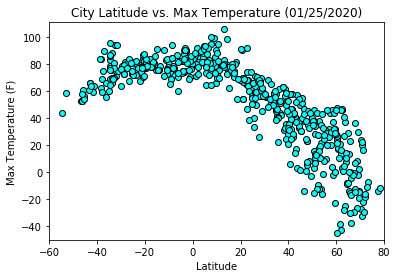

In [90]:
#creating the scatter plot
plt.scatter(lats, maxTemp, edgecolors="black", facecolors="aqua")

#plot axis and title formatting
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

#setting the date in the title to match the day the program was run
today = date.today()
d1 = today.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Max Temperature ({d1})")

#setting axis bounds
plt.axis([-60, 80, min(maxTemp)-5, max(maxTemp)+5])

#saving figure to a .png file in the figures folder
plt.savefig("Figures/City_Latitude_vs._Max_Temperature.png")
plt.show

#### Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

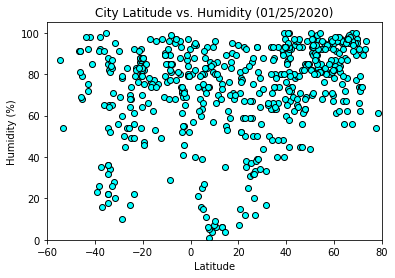

In [93]:
#creating the scatter plot
plt.scatter(lats, humidity, edgecolors="black", facecolors="aqua")

#plot labels
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")


#setting the date in the title to match the day the program was run
today = date.today()
d1 = today.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Humidity ({d1})")

#axis limits
plt.axis([-60, 80, 0, max(humidity)+5])

#saving figure to a .png file in the figures folder
plt.savefig("Figures/City_Latitude_vs._Humidity.png")
plt.show

#### Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

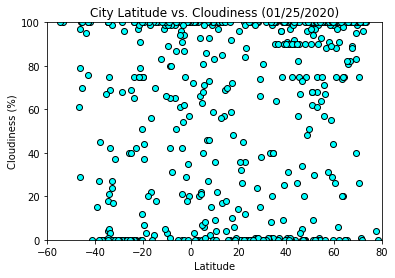

In [94]:
#creating scatter plot
plt.scatter(lats, cloudiness, edgecolors="black", facecolors="aqua")

#axis labels
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

#setting the date in the title to match the day the program was run
today = date.today()
d1 = today.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Cloudiness ({d1})")

#axis limits
plt.axis([-60, 80, 0, 100])

#saving figure to a .png file in the figures folder
plt.savefig("Figures/City_Latitude_vs._Cloudiness.png")
plt.show

#### Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

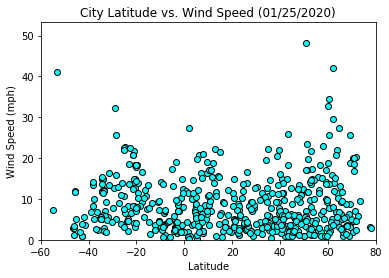

In [95]:
#creating scatter plot
plt.scatter(lats, windSpeed, edgecolors="black", facecolors="aqua")

#creating axis labels
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

#setting the date in the title to match the day the program was run
today = date.today()
d1 = today.strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Wind Speed ({d1})")

#axis limits
plt.axis([-60, 80, 0, max(windSpeed)+5])

#saving figure to a .png file in the figures folder
plt.savefig("Figures/City_Latitude_vs._Wind_Speed.png")
plt.show

## Linear Regression

In [18]:
# Create Northern and Southern Hemisphere DataFrames
#northern hemisphere dataframe has lat > 0
northern_lat = weather_df["Lat."] > 0
northern_df = weather_df[northern_lat]

#southern hemisphere has latitude <0
southern_lat = weather_df["Lat."] < 0
southern_df = weather_df[southern_lat]

#displaying first 5 rows of southern only dataframe to check it worked
southern_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat.,Lng.,Max Temp,Wind Speed
0,Cape Town,75,ZA,1579969097,82,-33.93,18.42,70.00,14.99
3,Bredasdorp,4,ZA,1579969356,54,-34.53,20.04,78.80,14.99
8,Punta Arenas,100,CL,1579969240,54,-53.15,-70.92,59.00,41.00
9,Sumbe,97,AO,1579969384,69,-11.21,13.84,83.37,9.28
14,Ancud,100,CL,1579969384,98,-41.87,-73.82,59.29,5.64


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

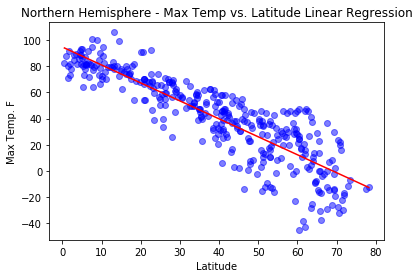

R Value is: -0.8704126614275578 and P Value is: 1.8909521494970094e-113


In [68]:
#setting x and y variables to run regression
x =  northern_df["Lat."]
y = northern_df["Max Temp"]

#creating linear regression and setting variables related to output
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)

#creating variables to plot the regression line
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept

#plotting the scatter plot of data, and the regression line to be drawn on top
plt.plot(x,y,'ob', alpha =.5)
plt.plot(x1,y1,'-r')

#plot axis and title formatting
plt.xlabel("Latitude")
plt.ylabel("Max Temp. F")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.show()
print(f"R Value is: {r_value} and P Value is: {p_value}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

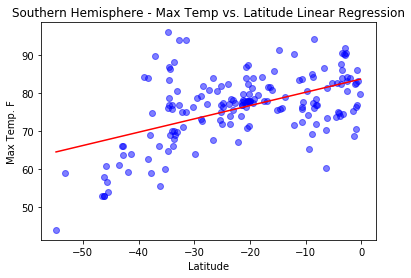

R Value is: 0.5199904963833415 and P Value is: 2.27266898620575e-13


In [67]:
#setting x and y variables to run regression
x =  southern_df["Lat."]
y = southern_df["Max Temp"]

#creating linear regression and setting variables related to output
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)

#creating variables to plot the regression line
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept

#plotting the scatter plot of data, and the regression line to be drawn on top
plt.plot(x,y,'ob', alpha =.5)
plt.plot(x1,y1,'-r')

#plot axis and title formatting
plt.xlabel("Latitude")
plt.ylabel("Max Temp. F")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.show()

#printing r and p value under the plot(for fun, no real reason)
print(f"R Value is: {r_value} and P Value is: {p_value}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

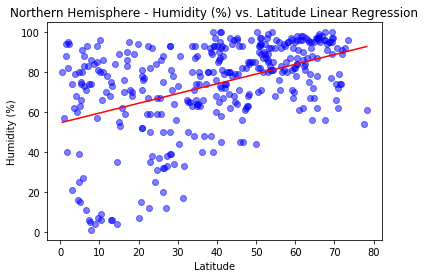

R Value is: 0.44263843337810477 and P Value is: 6.757372620405452e-19


In [66]:
#setting x and y variables to run regression
x =  northern_df["Lat."]
y = northern_df["Humidity"]
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)

#creating variables to plot the regression line
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept


#plotting the scatter plot of data, and the regression line to be drawn on top
plt.plot(x,y,'ob',alpha =.5)
plt.plot(x1,y1,'-r')

#plot titles and labels
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.show()

#printing r and p value under the plot(for fun, no real reason)
print(f"R Value is: {r_value} and P Value is: {p_value}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

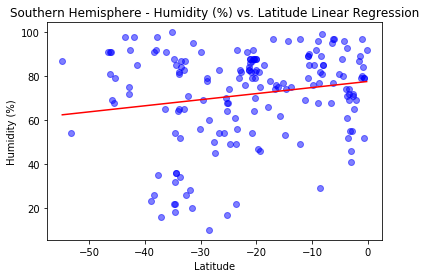

R Value is: 0.17794454799143616 and P Value is: 0.019167756006551837


In [65]:
#setting x and y variables to run regression
x =  southern_df["Lat."]
y = southern_df["Humidity"]
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)

#creating variables to plot the regression line
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept


#plotting the scatter plot of data, and the regression line to be drawn on top
plt.plot(x,y,'ob',alpha =.5)
plt.plot(x1,y1,'-r')

#plot titles and labels
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.show()

#printing r and p value under the plot(for fun, no real reason)
print(f"R Value is: {r_value} and P Value is: {p_value}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

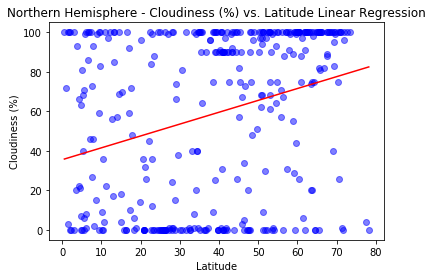

R Value is: 0.2923258930033868 and P Value is: 1.3262917898728921e-08


In [64]:
#setting x and y variables to run regression
x =  northern_df["Lat."]
y = northern_df["Cloudiness"]
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)


#creating variables to plot the regression line
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept


#plotting the scatter plot of data, and the regression line to be drawn on top
plt.plot(x,y,'ob',alpha =.5)
plt.plot(x1,y1,'-r')

#plot titles and labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.show()

#printing r and p value under the plot(for fun, no real reason)
print(f"R Value is: {r_value} and P Value is: {p_value}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

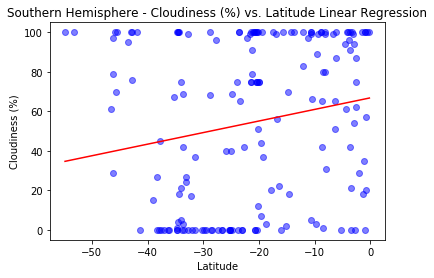

R Value is: 0.19167906598716408 and P Value is: 0.011525876146469822


In [63]:
#setting x and y variables to run regression
x =  southern_df["Lat."]
y = southern_df["Cloudiness"]
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)

#creating variables to plot the regression line
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept


#plotting the scatter plot of data, and the regression line to be drawn on top
plt.plot(x,y,'ob',alpha =.5)
plt.plot(x1,y1,'-r')


#plot titles and labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.show()

#printing r and p value under the plot(for fun, no real reason)
print(f"R Value is: {r_value} and P Value is: {p_value}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

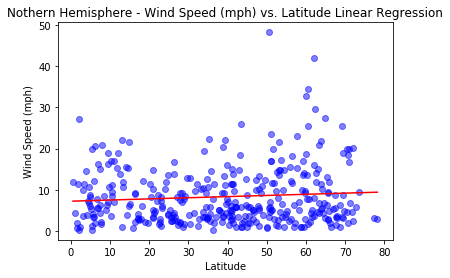

R Value is: 0.08345341670544475 and P Value is: 0.11195045642798482


In [62]:
#setting x and y variables to run regression
x =  northern_df["Lat."]
y = northern_df["Wind Speed"]

gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)


#creating variables to plot the regression line
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept


#plotting the scatter plot of data, and the regression line to be drawn on top
plt.plot(x,y,'ob',alpha =.5)
plt.plot(x1,y1,'-r')

#plot titles and labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Nothern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.show()

#printing r and p value under the plot(for fun, no real reason)
print(f"R Value is: {r_value} and P Value is: {p_value}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

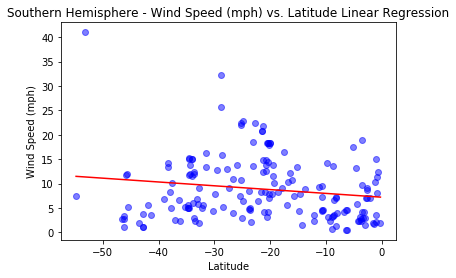

R Value is: -0.16279662109801418 and P Value is: 0.03235239622966941


In [61]:
#setting x and y variables to run regression
x =  southern_df["Lat."]
y = southern_df["Wind Speed"]

gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)


#creating variables to plot the regression line
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept


#plotting the scatter plot of data, and the regression line to be drawn on top
plt.plot(x,y,'ob',alpha =.5)
plt.plot(x1,y1,'-r')

#plot titles and labels
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.show()

#printing r and p value under the plot(for fun, no real reason)
print(f"R Value is: {r_value} and P Value is: {p_value}")